# Ensemble Regression


앙상블 기법은 모델의 예측 성능을 높이기 위해 여러 개의 기본 모델들의 결과를 조합하여 사용하는 방식입니다. 선형/비선형 데이터셋 및 분류/회귀 문제 모두에 사용할수 있습니다.

앙상블 기법에서 모델을 학습시키기 위해 학습 데이터 셋을 구성하는 방식으로 Bootstrapping 방식을 사용합니다. 이는 흔히 말하는 '랜덤 복원 샘플링'입니다. 샘플에서 랜덤 복원 샘플을 통해 리샘플링한 다양한 학습 데이터 셋을 구성함으로써 아래 그림 처럼 전체적으로 평균, 분산 등의 통계적 특성은 같은 샘플이어도 그 안에 속한 샘플들은 각각 다양한 특성을 포함하도록 하여 강건한 모델을 학습시키는데 도움이 되도록 합니다.

* Bootstrapping: 
![Bootstrapping](https://cdn-images-1.medium.com/max/2400/0*jW2hAGmYEFH0RP9W.)

## Bagging methods

데이터를 Bootstrapping 하여 만든 학습 데이터 셋에 대하여 각각 독립적인 모델을 학습 시킨 후, 각 모델이 예측 한 값의 평균(Average, 연속형 변수) 또는 다수 투표(Majority Voting, 범주형 변수)방식을 통한 Bootstrap Aggregating하여 예측하는 방식 (복수의 독립적인 모델을 사용하는 방식이기에 분산처리 가능하여 학습 속도가 빠름)
  * 예: Random Forest, ...
![Bagging](https://cdn-images-1.medium.com/max/1600/1*DFHUbdz6EyOuMYP4pDnFlw.jpeg)
  
## Boosting methods

약한 학습기(weak learner)을 학습 시키고, 예측 오류를 최소화 하기위해 약한 학습기(weak learner)를 추가하는 식의 순차적 학습 방식을 통해 강한 학습기(strong learner)를 만드는 방법 (순차적으로 학습을 진행하는 방식으로 분산처리가 불가능하여 학습 속도가 느림)
  * 예: AdaBoost, XGBoost, GradientBoost, ...

![Boosting](https://cdn-images-1.medium.com/max/1600/1*C7CrBG1VNaa1x491eZ3fnw.gif)

## Stacking methods

모델링 알고리즘(SVM, RandomForest, XGBoost, ...)들은 각기 다른 장단점을 가지기 때문에 서로 다른 모델링 알고리즘을 조합해서 최고의 성능을 내는 모델을 생성하는 방법
  * 예: StackNet, ...

![Stacking](https://cdn-images-1.medium.com/max/1600/0*GHYCJIjkkrP5ZgPh.png)

In [5]:
# Setup
!pip install -qU xgboost

In [15]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import platform, sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"python platform={platform.architecture()}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python platform=('64bit', '')
python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


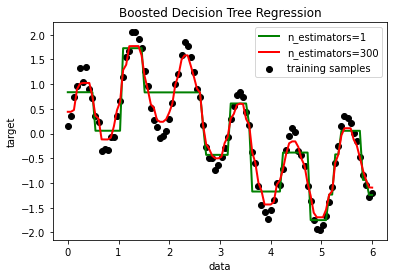

In [12]:
# 참조: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

data shape: xs=(1000, 1), ys=(1000,)
train shape: train_xs=(700, 1), train_ys=(700,)
test shape: test_xs=(300, 1), test_ys=(300,)


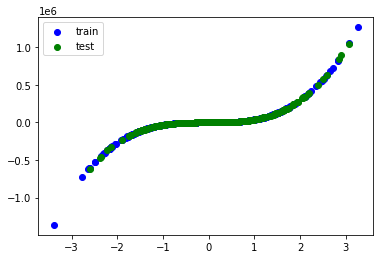


model=BaggingRegressor()
r_square=0.99733


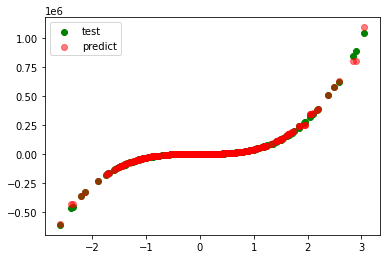


model=RandomForestRegressor()
r_square=0.99870


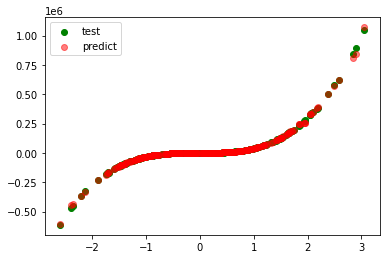


model=AdaBoostRegressor()
r_square=0.97916


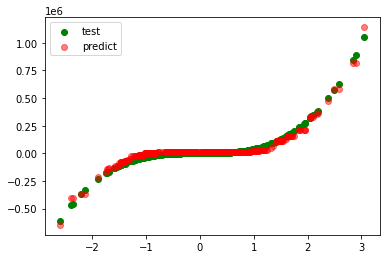


model=GradientBoostingRegressor()
r_square=0.99848


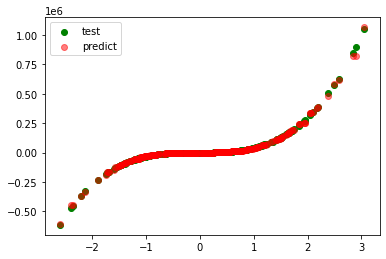


model=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
r_square=0.99850


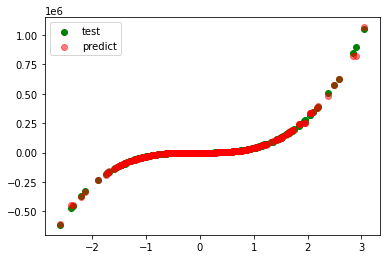

In [13]:
import xgboost as xgb
from sklearn import datasets, preprocessing, model_selection, ensemble, metrics

# 데이터
n_samples = 1000
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
ys = ys**3 # Y 차원
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, shuffle=True, random_state=2)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")
plt.scatter(train_xs, train_ys, label='train', c='b')
plt.scatter(test_xs, test_ys, label='test', c='g')
plt.legend()
plt.show()

# 모델
models = [
    ensemble.BaggingRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.AdaBoostRegressor(),
    ensemble.GradientBoostingRegressor(),
    xgb.XGBRegressor()    
]

for model in models:
    # 학습
    print(f"\nmodel={model}")
    model.fit(train_xs, train_ys)

    # 평가
    pred_ys = model.predict(test_xs)

    r_square = metrics.r2_score(test_ys, pred_ys)
    print(f"r_square={r_square:.5f}")
    
    plt.scatter(test_xs, test_ys, label='test', c='g')
    plt.scatter(test_xs, pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()